In [72]:
import mushi

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import msprime
import tskit
from itertools import tee

from glob import glob

In [85]:
t = np.logspace(np.log10(1), np.log10(200000), 50)
#mu = 3e-8
mu = 1e-7
bps = 10000
c = 1.6e-8

sfs_files = glob("../data/angsd_pi/v5--Teo--random1*.sfs")
sfs_list = []

for sfs_file in sfs_files:
    with open(sfs_file) as f:
        sfs = f.readlines()[0].split()
        sfs_chr = np.array([float(s) for s in sfs])
        sfs_list.append(sfs_chr)

sfs_array = np.asarray(sfs_list)
sfs_all = sfs_array.sum(axis=0)
print(sfs_all)

[4.26842830e+08 8.44963068e+06 4.18664091e+06 2.17393710e+06
 1.27240398e+06 8.21830933e+05 5.75642557e+05 4.29737786e+05
 3.61886515e+05 2.66786633e+05 2.38767150e+05 1.91556458e+05
 1.69395800e+05 1.65859271e+05 1.48677274e+05 1.57244571e+05
 1.47637848e+05 1.48075018e+05 1.51510235e+05 1.62834966e+05
 3.03086313e+05]


inferring Î·(t)
initial objective -2.783152e+08
iteration 361, objective -2.805e+08, relative change 9.136e-15                                                                                                                                                       
relative change in objective function 9.1e-15 is within tolerance 1e-12 after 361 iterations


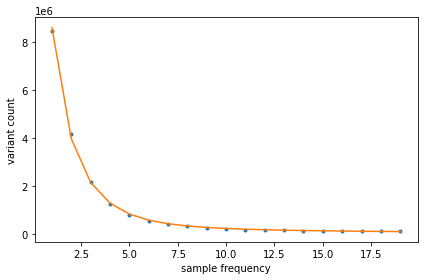

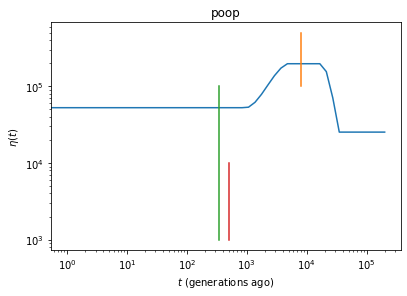

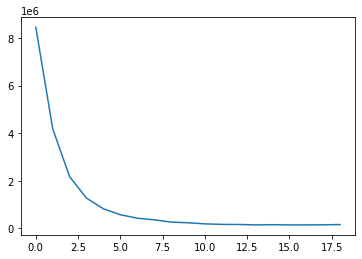

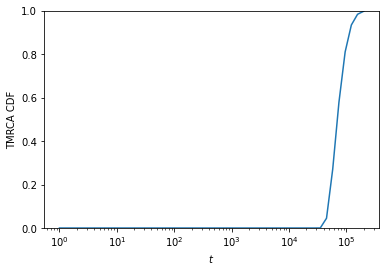

In [86]:
ksfs = mushi.kSFS(np.array(sfs_all[1:-1]))
ksfs.infer_history(t, mu0 = mu*sum(sfs_all), infer_mu=False, folded = False,
                   alpha_tv=1e4, alpha_spline=1e4, alpha_ridge = 1e-1,
                   tol=1e-12, verbose=True, max_iter = 5000)

ksfs.plot_total()
plt.show()
plt.xscale('log')
plt.yscale('log')
ksfs.eta.plot()
plt.title("poop")
plt.plot((8000, 8000), (100000, 500000))
plt.plot((350, 350), (1000, 100000))
plt.plot((500, 500), (1000, 10000))
plt.show()
plt.plot(sfs_all[1:-1])
plt.show()

plt.plot(t, ksfs.tmrca_cdf(ksfs.eta))
plt.xlabel('$t$')
plt.ylabel('TMRCA CDF')
plt.ylim([0, 1])
plt.xscale('log')
plt.show()

In [87]:
Nt = ksfs.eta.vals
T = ksfs.eta.change_points

N_0 = Nt[0] / 2
msp_N = Nt[1:] / 2
msp_T = T
nsamp = len(sfs_all)-1

#ms_N = Nt[1:]/N_0
#ms_T = T/(4*N_0)


population_configurations = [msprime.PopulationConfiguration(sample_size = nsamp, initial_size = N_0)]
demography_list = [msprime.PopulationParametersChange(time = t, initial_size = n) for t, n, in zip(msp_T, msp_N)]

ts_mushi = msprime.simulate(
    population_configurations=population_configurations, 
    demographic_events = demography_list, 
    #Ne = N_0, sample_size = nsamp,
    length = bps, 
    recombination_rate = c, 
    mutation_rate = mu, 
    num_replicates = 2000
)

ts_mushi, ts_mushi_copy = tee(ts_mushi)


#pi = [ts.diversity() for ts in ts_mushi]
#td = [ts.Tajimas_D() for ts in ts_mushi]

print(np.nanmean(list(map(lambda a : [a.diversity().item(), a.Tajimas_D().item()], ts_mushi)), axis=0))
#list(map(lambda a : [a.diversity().item(), a.Tajimas_D().item()], ts_mushi))


[ 0.00989869 -0.91296725]


In [88]:
msp_N/N_0

DeviceArray([1.        , 1.        , 1.        , 1.        , 1.        ,
             1.        , 1.        , 1.        , 1.        , 1.        ,
             1.        , 1.        , 1.        , 1.        , 1.        ,
             1.        , 1.        , 1.        , 1.        , 1.        ,
             1.        , 1.        , 1.        , 1.        , 1.        ,
             1.        , 1.        , 1.        , 1.01499408, 1.17450835,
             1.49253568, 1.98101404, 2.6144743 , 3.28144373, 3.7453654 ,
             3.7453654 , 3.7453654 , 3.7453654 , 3.7453654 , 3.7453654 ,
             2.95619599, 1.34074768, 0.4802945 , 0.4802945 , 0.4802945 ,
             0.4802945 , 0.4802945 , 0.4802945 , 0.4802945 , 0.4802945 ],            dtype=float64)

In [89]:
2231 / 55000

0.040563636363636364

In [90]:
N_0 = Nt[0] / 2
msp_N = (Nt[1:] / 2).astype('int')
msp_T = (T).astype('int')
nsamp = len(sfs_all)-1

N_1 = msp_N[0:-1][::-1]
N_2 = msp_N[1:][::-1]

T_1 = msp_T[0:-1][::-1]
T_2 = msp_T[1:][::-1]

print(', '.join([str(i) for i in N_1]))
print(', '.join([str(i) for i in N_2]))

print(', '.join([str(max(msp_T) - i + 1) for i in T_2]))
print(', '.join([str(max(msp_T) - i) for i in T_1]))


12641, 12641, 12641, 12641, 12641, 12641, 12641, 35289, 77809, 98580, 98580, 98580, 98580, 98580, 98580, 86369, 68814, 52141, 39284, 30913, 26715, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320
12641, 12641, 12641, 12641, 12641, 12641, 12641, 12641, 35289, 77809, 98580, 98580, 98580, 98580, 98580, 98580, 86369, 68814, 52141, 39284, 30913, 26715, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320, 26320
1, 44102, 78478, 105274, 126161, 142443, 155135, 165028, 172740, 178751, 183437, 187089, 189936, 192156, 193886, 195234, 196285, 197105, 197744, 198241, 198630, 198932, 199168, 199352, 199495, 199607, 199694, 199762, 199814, 199856, 199888, 199913, 199932, 199948, 199960, 199969, 199976, 199982, 199986, 199989, 199

In [91]:
print(N_0)
((462.9318338034885  + 694.3977507052326)/2)/(4*3e-8*55000)

26320.720737689062


87676.48367490312

In [97]:
print(2 * 87676 * 0.001)
print(2 * N_0 * 0.001)

175.352
52.64144147537812
